Question 1: What is a Decision Tree, and how does it work in the context of
classification?

    - > A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks.

      It models decisions as a tree-like structure, where:

      Nodes represent a feature/attribute.

      Branches represent a decision rule.

      Leaf nodes represent the final outcome or class label.

      It’s called a “tree” because it splits data recursively, similar to how a flowchart works.

     How it works in classification
        Start at the root node:

        Split the data:

        Recursive splitting:

        Assign class labels to leaf nodes:



Question 2: Explain the concepts of Gini Impurity and Entropy as impurity measures.
How do they impact the splits in a Decision Tree?

Gini Impurity - Definition: Measures the probability of a random sample being incorrectly classified if it is randomly labeled according to the distribution of classes in the node.

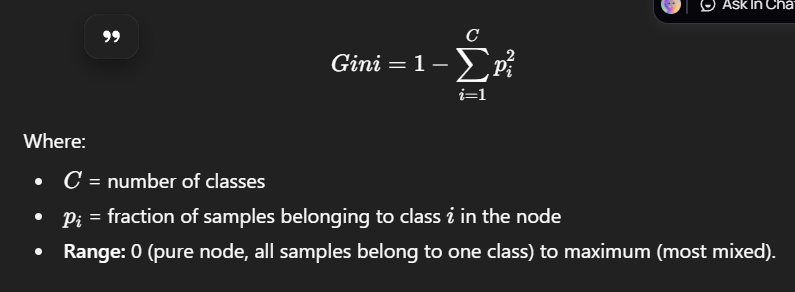


Entropy (Information Gain )
It measure the imputrity present in the data.
Entropy = 0 (Pure data means fully perfect data )
Entropy =1 (Fully impure data , useless data )

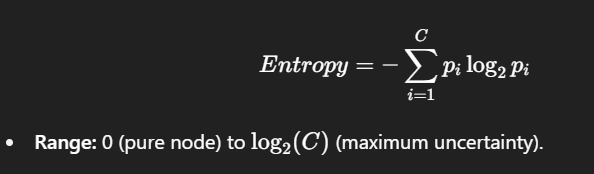


Impact on split :
Decision Trees choose the feature split that reduces impurity the most.

Gini or Entropy calculates impurity before and after a split, and the tree chooses the split that maximizes “purity gain”.

Lower impurity → more homogeneous nodes → better classification.




Question 3: What is the difference between Pre-Pruning and Post-Pruning in Decision Trees? Give one practical advantage of using each.


1. Pre-Pruning (Early Stopping)

Stop tree growth before it becomes fully grown.

Examples of pre-pruning parameters:

max_depth , min_samples_split , min_samples_leaf

Advantage:
  Reduces overfitting and keeps the tree simpler.
  Faster to train.

2. Post-Pruning (Reduced Error Pruning)

Grow a full tree first, then remove nodes that do not improve validation performance.

Simplifies tree after training.

Advantage:

Often achieves better accuracy because the tree learns full patterns first before simplification.




Question 4: What is Information Gain in Decision Trees, and why is it important for choosing the best split?


Definition: Measures the reduction in entropy (uncertainty) achieved by splitting a node based on a feature.

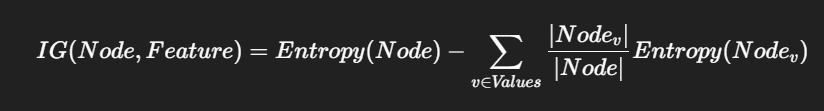


Importance:

Higher Information Gain → split reduces impurity more → better separation of classes.

Decision Trees use Information Gain to choose the “best feature” for each split.




Question 5: What are some common real-world applications of Decision Trees, and
what are their main advantages and limitations?

Applications

Medical Diagnosis: Predict disease based on symptoms.

Customer Segmentation: Marketing and sales predictions.

Credit Scoring: Assessing loan default risk.

Fraud Detection: Identifying fraudulent transactions.

Manufacturing: Predicting equipment failure.

Advantages

Easy to interpret and visualize.

Handles numerical and categorical data.

Captures non-linear relationships.

Requires little data preprocessing.

Question 6: Write a Python program to:

● Load the Iris Dataset

● Train a Decision Tree Classifier using the Gini criterion

● Print the model’s accuracy and feature importances


In [1]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris Dataset
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Target labels

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train a Decision Tree Classifier using Gini criterion
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_classifier.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# 5. Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

# 6. Print feature importances
print("Feature importances:")
for feature, importance in zip(iris.feature_names, dt_classifier.feature_importances_):
    print(f"{feature}: {importance:.2f}")


Accuracy of Decision Tree Classifier: 1.00
Feature importances:
sepal length (cm): 0.00
sepal width (cm): 0.02
petal length (cm): 0.91
petal width (cm): 0.08


Question 7: Write a Python program to:
● Load the Iris Dataset
● Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to
a fully-grown tree

In [3]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train a fully-grown Decision Tree (no depth limit)
full_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
full_tree.fit(X_train, y_train)

# 4. Train a Decision Tree with max_depth=3
limited_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
limited_tree.fit(X_train, y_train)

# 5. Make predictions
y_pred_full = full_tree.predict(X_test)
y_pred_limited = limited_tree.predict(X_test)

# 6. Calculate and print accuracies
accuracy_full = accuracy_score(y_test, y_pred_full)
accuracy_limited = accuracy_score(y_test, y_pred_limited)

print(f"Accuracy of fully-grown tree: {accuracy_full:.2f}")
print(f"Accuracy of tree with max_depth=3: {accuracy_limited:.2f}")


Accuracy of fully-grown tree: 1.00
Accuracy of tree with max_depth=3: 1.00


Question 8: Write a Python program to:
● Load the Boston Housing Dataset
● Train a Decision Tree Regressor
● Print the Mean Squared Error (MSE) and feature importances


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print("Feature Importances:", reg.feature_importances_)


Mean Squared Error: 0.495
Feature Importances: [0.52850909 0.05188354 0.05297497 0.02866046 0.03051568 0.13083768
 0.09371656 0.08290203]


Question 9: Write a Python program to:
● Load the Iris Dataset
● Tune the Decision Tree’s max_depth and min_samples_split using
GridSearchCV
● Print the best parameters and the resulting model accuracy


In [5]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# 4. Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5]
}

# 5. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6. Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 7. Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best Decision Tree model: {accuracy:.2f}")


Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Accuracy of the best Decision Tree model: 1.00
